# Introduction to Data Analytics

Welcome to the hands-on exercise!

In this notebook, we explore the basics of Python programming for data analytics, including how to work with datasets, and the basic skills needed for data analysis:

- Importing Data
- Cleaning & Tidying Data
- Exploratory Data Analysis
- Data Visualisation

We'll use the Palmer Penguins dataset for this session!

The `palmerpenguins` dataset by Allison Horst, Alison Hill, and Kristen Gorman was first made publicly available as an `R` package.

The goal of the Palmer Penguins dataset is to replace the highly overused Iris dataset for data exploration & visualization.

The dataset includes data on the following penguins:

- `344` penguins
- `3` penguin species (Adélie, chinstrap, and gentoo)


# Zen of Python

## `TODO`:

Try typing `import this` in the following code block

Then click the **Run Cell** arrow (or `CTRL` + `Enter`)



In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Your Favourite Pythonic Principle

What's your favourite **Pythonic principle** from the **Zen of Python**?

Type it in this **Text** cell:



# Install Packages

If the Python packages we need for our analysis are not part of the [standard library](https://docs.python.org/3/library/index.html) (i.e. built-in to Python), we need to install them.

For this session, we'll install `kaggle` (to get our data), `pandas`, `matplotlib`, and `seaborn`.

To install the packages, type for example `!pip install pandas`, for each package in the following code cell and run the cell.

In [ ]:
#!pip install kaggle
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Import Packages

At the beggining of each notebook or Python script, we import the packages we'll use for data analysis.

The `import` function is used to import **packages** (also known as libraries or modules), so that we can use them in our code.

For this session, we import `pandas` for data importing and exploration, `matplotlib`, and `seaborn` for data visualisation.

When we import packages, we use aliases, which abbreviates the package names.

For example:

```
import numpy as np
import pandas as pd
import seaborn as sns
```

# Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("dark_background")

# Download/Import Dataset

To analyse our dataset using Python, we need to download/import it.

We can download/import data in a number of different ways.

In this session, we'll use the Kaggle `API` to download the `palmerpenguins` dataset. This is useful if we want to analyse multiple datasets from [Kaggle](https://www.kaggle.com/), or enter a Kaggle competition!

But, we could have done this in several other ways, for example, you would create new code cells and download the dataset as follows. We'll explore these options in a future class, but you can skip them for now!

1. Manually download the dataset from [here](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data) instead.

2. Install [palmerpenguins](https://pypi.org/project/palmerpenguins/) package:

```
!pip install palmerpenguins

from palmerpenguins import load_penguins

penguins = load_penguins()
```
3. Load dataset with [seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html):

```
!pip install seaborn
import seaborn
seaborn.load_dataset(penguins)
```

4. Load dataset with [tensorflow](https://www.tensorflow.org/datasets/catalog/penguins):

```
!pip install -q tfds-nightly tensorflow matplotlib
import tensorflow_datasets as tfds
ds = tfds.load('penguins', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)
```

We'll try these different methods in a future session!


# Setup Kaggle API

For this session, we'll retrieve the dataset from Kaggle, using the Kaggle `API`.

To do this in Google Colab, we need to mount our Google Drive, to use it for saving the Kaggle dataset.

The following code sets up Kaggle for use from our Colab notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/introduction-to-data-analytics
#!ls
#!mkdir -p /content/drive/MyDrive/.kaggle
#!cp kaggle.json /content/drive/MyDrive/.kaggle/
#!chmod 600 /content/drive/MyDrive/.kaggle/kaggle.json

# Change the permissions of the file
#!chmod 600 ~/.kaggle/kaggle.json

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/introduction-to-data-analytics


# Download and Inspect Dataset Files

This code downloads two dataset files:

`penguins_size.csv`, which we rename to `penguins.csv` for clarity

`penguins_lter.csv`, which we rename to `penguins-raw.csv` for clarity

In [ ]:
#!kaggle datasets download -d parulpandey/palmer-archipelago-antarctica-penguin-data
#!unzip -q palmer-archipelago-antarctica-penguin-data.zip
#!ls

In [ ]:
#%mv penguins_size.csv penguins.csv
#%mv penguins_lter.csv penguins-raw.csv

In [ ]:
#!ls -lhart

# Inspect Data File

We'll use the `penguins.csv` file for this session.

This is a tidied version of the original `penguins-raw.csv` dataset, and will be easier for us to use.

We know this is a `.csv` file. `CSV` means [Comma-Separated Values](https://en.wikipedia.org/wiki/Comma-separated_values). A `.csv` file is a text file, where values are separated by commas.

`CSV` files are very common formats, especially for storing **tabular** data (i.e., structured, spreadsheet-like, labeled data).

Let's look at the original text of the file using the `head` bash command, which shows the first 10 rows of the file by default.

In [ ]:
!head penguins.csv

species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18,195,3250,FEMALE
Adelie,Torgersen,NA,NA,NA,NA,NA
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
Adelie,Torgersen,39.3,20.6,190,3650,MALE
Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
Adelie,Torgersen,39.2,19.6,195,4675,MALE
Adelie,Torgersen,34.1,18.1,193,3475,NA


# Import Dataset into Pandas

To analyse our data using `pandas`, we need to import it.

`pandas` can read and write a variety of file formats, including `CSV`!

To use `pandas`, we use the alias `pd` that we defined earlier.

Each package has functions, which we use as follows:

1. Read the CSV file with Pandas:

`pd.read_csv("filename.csv")`

Pandas automatically creates a `DataFrame` object containing the dataset.

2. Assign the DataFrame to a variable:

`our_dataset = pd.read_csv("filename.csv")`

`TODO`: Write a line of code to read the penguins CSV file with Pandas and assign the dataset to a variable called `penguins`.




In [ ]:
penguins = pd.read_csv("penguins.csv")

# Inspecting the DataFrame

When we first import our dataset, we should inspect it.

There are several ways to do this!

(Remember the Zen of Python?! 😆)

# Type the Name of the DataFrame

First, we can just type the name of the variable, and run the code cell.

`TODO`: Type the name of the variable (e.g. `our_dataset`) into this cell and run the cell!

In [ ]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Shape of DataFrame

To find the number of rows and columns in the DataFrame, use the `.shape` DataFrame method, which returns `(rows, columns)`.

For example, try `our_dataset.shape`.

In [ ]:
penguins.shape

(334, 7)

# Questions: Data Inspection

- How many rows are in the dataset?

- How many columns are in the dataset?

- Are there any words in the columns you don't understand?

# More Information about the DataFrame

We can get specific information about the **data types**, **rows**, **columns**, and memory use of the DataFrame by using the DataFrame method `info()`, for example:

```
our_dataset.info()
```

`TODO`: What information can you discover about our `penguins` DataFrame?

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Questions: Information on DataFrame

- What are the names of the columns?
- What are their data types (`Dtype`)?

# Descriptive Statistics for Numeric Values

We can use the `.describe()` DataFrame method to get descriptive statistics for **numeric** values in the dataset.

This summarises the **central tendency**, **dispersion**, and **shape** of the numeric values in the dataset, including:

- count
- mean
- standard deviation (std)
- min
- percentiles (25th, 50th (median), 75th)
- max

`TODO`: Use this method to find out the descriptive statistics for the `penguins` dataset!

In [ ]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Questions: Descriptive Statistics for Numeric Values

What are the mean values for the following columns?

- `culmen_length_mm`
- `culmen_depth_mm`
- `flipper_length_mm`
- `body_mass_g`

Notice that not all columns are included in the descriptive statistics.

Which columns are missing?

Why do you think they're missing?

# Clean & Tidy Data

Did you notice any unusual words in the column names?

`culmen` means the `bill` of the penguin

It sometimes helps to rename column names to make our dataset easier to understand!

![Culmen](https://agrogan1.github.io/teaching/simpsons-paradox-palmer-penguins/culmen_depth.png "Culmen")

`TODO`: rename the columns to replace `culmen` with `bill` using the `.rename()` DataFrame method:

```
our_dataset.rename(columns = {
  "original_column_one": "new_column_one",
  "original_column_two": "original_column_two"
  })
```





# Drop Missing Values

As we do not have many missing values in the dataset (`18`), let's simply drop rows with `NaN` values.

We can do this using the `.dropna()` DataFrame method:

In [ ]:
# Drop NaN values from DataFrame
penguins.dropna(inplace=True)

# Check and Convert Data Types

Before we visualise our data, we should check the data types, and if necessary, convert those data types.

When `pandas` imports a dataset, it makes assumptions about the data types, which might not be correct.

So, first, let's check the data types, using the `.dtypes` DataFrame method.

In [ ]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Notice how `pandas` has assigned `object` to the following columns:

- `species`
- `island`
- `sex`

Let's convert these data types to categorical:

In [ ]:
# Convert 'species', 'island', and 'sex' columns to categorical
penguins['species'] = penguins['species'].astype('category')
penguins['island'] = penguins['island'].astype('category')
penguins['sex'] = penguins['sex'].astype('category')

In [ ]:
# Check data types
penguins.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [ ]:
penguins = penguins.rename(columns={"culmen_length_mm":"bill_length_mm","culmen_depth_mm":"bill_depth_mm"})

# Data Visualisation

The simplest way to visualise data in Python is to use the functions within `pandas`.

`pandas` uses `matplotlib` as the default visualisation library.

```
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot (DataFrame only)
- 'hexbin' : hexbin plot (DataFrame only)
```


# Scatterplot

If our values are numeric, a scatterplot - or point plot - is a good candidate for a visualisation!

Here's a skeleton code chunk for plotting a scatterplot:

```python
our_dataframe.plot.scatter(
  x="numeric_variable_one", # x-axis
  y="numeric_variable_two", # y-axis
  c="our_category", # colour of each point
  cmap="viridis") # sets colour map for categories
```

Try plotting a scatterplot of `bill_length_mm` vs `bill_depth_mm` with `species` as the category.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

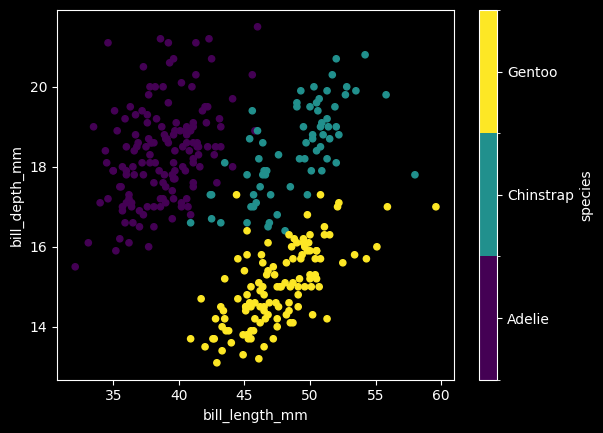

In [ ]:
penguins.plot.scatter(
    x="bill_length_mm",
    y="bill_depth_mm",
    c="species",
    cmap="viridis")

# Boxplot

If we want to compare the numeric values across categories, a boxplot might be a good choice, otherwise known as a "box-and-whisker" plot.

Boxplots help us see any extreme values ('outliers') in the data.

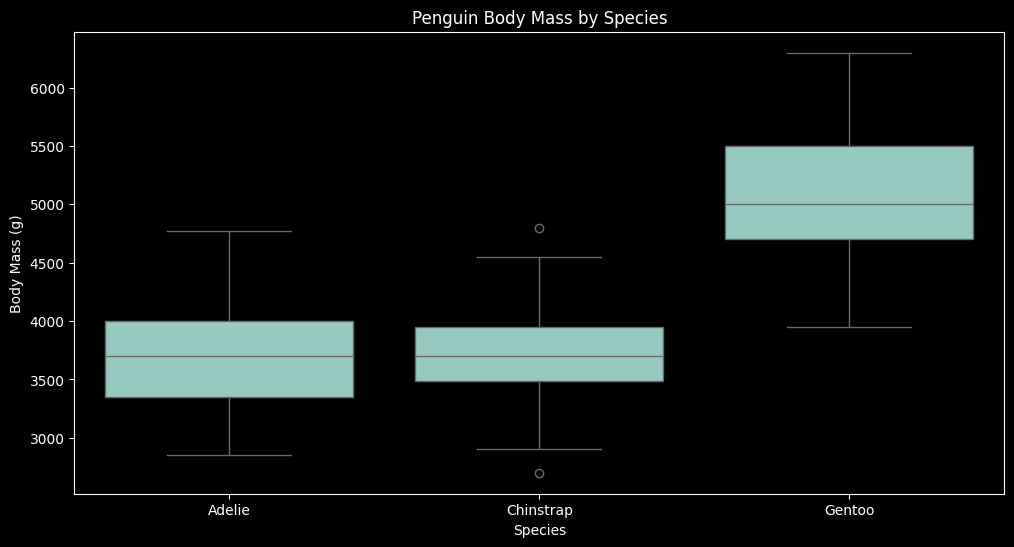

In [ ]:
# Plot boxplots of the penguins dataset according to species
plt.figure(figsize=(12, 6))
sns.boxplot(x='species',
            y='body_mass_g',
            data=penguins)
plt.title('Penguin Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Question: Boxplot

- What do you notice about the differences in body mass across species?

- Which is the largest penguin species?

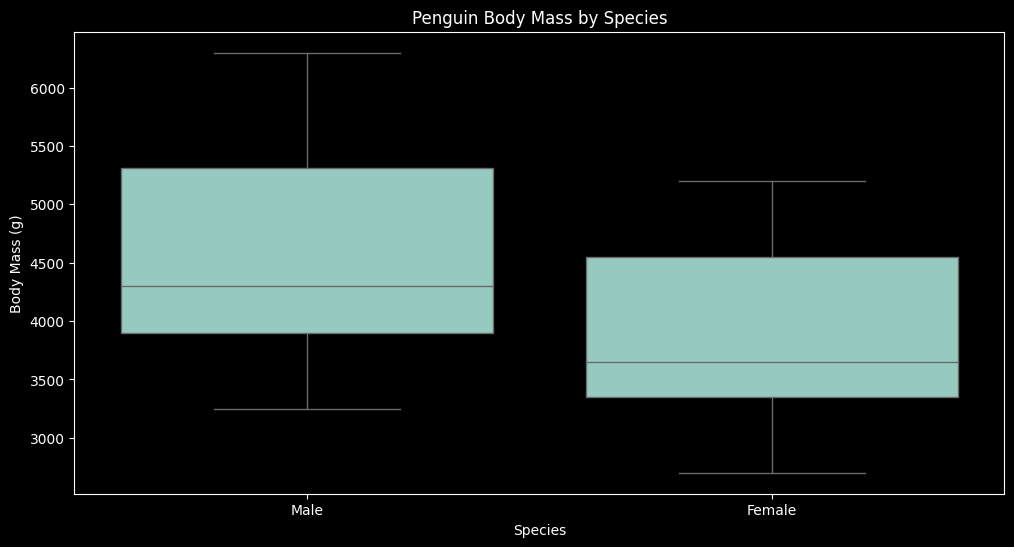

In [ ]:
# Plot boxplots of the penguins dataset according to sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex',
            y='body_mass_g',
            data=penguins)
plt.title('Penguin Body Mass by Sex')
plt.xlabel('Sex')
plt.ylabel('Body Mass (g)')
plt.show()

# Question: Boxplot

- What do you notice about the difference in body mass by sex?

- Which sex has the biggest body mass?

# Descriptive Statistics for Categorical Values

Pandas automatically treats categorical values, such as strings (e.g. `Adelie`), as `object` data types.

To quickly summarise the object values, we can also use `.describe()`, specifying the data type we want. In this case, `object`.

In our case, this code returns:

- `count`
- `unique`
- `top`
- `freq`

for each categorical column variable.

In [ ]:
penguins.describe(include=['object'])

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


# Bar Chart

To compare numerical values across different categories, we can use a bar chart.

Which species has the longest average bill length?

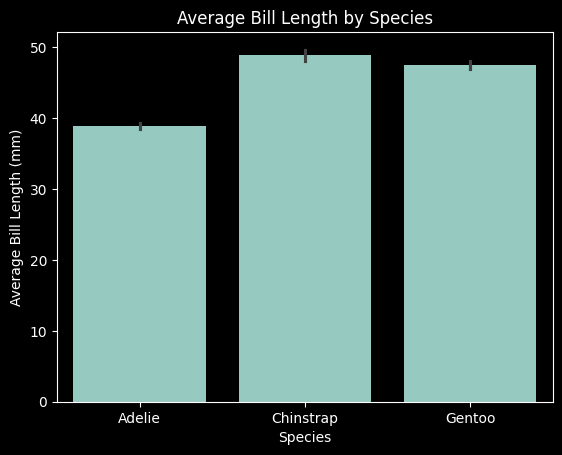

In [ ]:
# Bar chart of average bill length by species
sns.barplot(data=penguins,
            x='species',
            y='bill_length_mm')
plt.title('Average Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Bill Length (mm)')
plt.show()

# Check Missing Values

Real-life datasets in the wild are often "messy", rather than "tidy".

One way a dataset is "messy" is when there are missing values.

In Python, missing values are variously called:

- `None` (absence of a value, e.g., empty variable)
- `NaN` ("Not a Number") is used in `numpy` and `pandas` to indicate missing data in numerical arrays
- `NaT` ("Not a Time") is used in `pandas` to indicate missing or null date/time values
- `.NA` ("Not Available") is a newer method used in `pandas` to indicate missing data across data types (not only numerical data)

(Still remember the Zen of Python?! 🤯)

In SQL, `Null` is used to indicate missing values in a database.

In this class, we'll just use `NaN`!

`TODO`: view the DataFrame again using `penguins` or `penguins.head()`. Do you notice any missing values?

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Locate Missing Values

If there are missing values (e.g. `NaN`) in a dataset, we should try to locate them, and find how many there are.

You might have guessed that we can do this in several ways!

One is to `sum` the total number of missing values for each column:

In [ ]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Another is to create a total of all missing values:

In [ ]:
penguins.isna().sum().sum()

18

# Descriptive Statistics for Categorical Values

Now, after removing `NaN` values and convering data types, we can check again the counts for the number of penguins of each species.

In [ ]:
penguins.describe(include=['category'])

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


In [ ]:
penguins['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

# Histogram of Species

Visualising the frequency counts for each species of penguin.

To plot a histogram of the species of penguin, we select the column:

```
our_dataframe['the_column']
```

And then add the plotting function:

```
our_dataframe['the_column'].hist()
```

We choose histogram to show the frequency distribution across categories.

<Axes: >

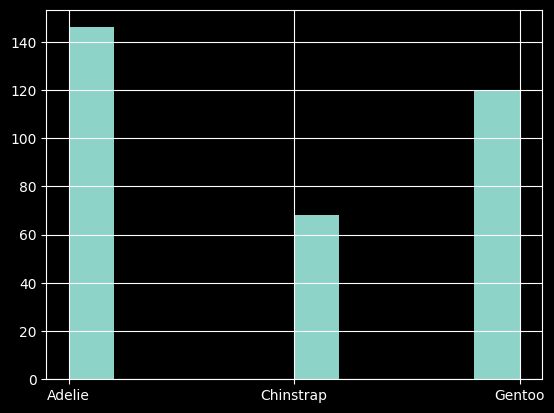

In [ ]:
penguins['species'].hist()

# Advanced Data Visualisation

Now we've downloaded/imported, inspected and cleaned/tidied our data, we're ready to produce some more advanced data visualisations of our dataset!

# Histogram with Kernel Density Estimation (KDE)

Visualises the frequency distribution of a numerical value.

In this case, penguin bill lengths.

What kind of distribution is bill lengths?

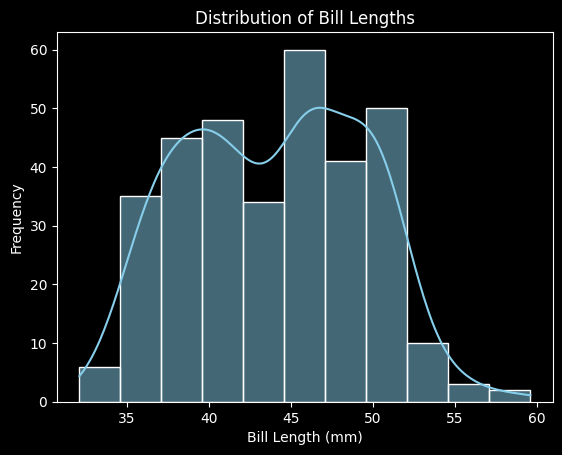

In [ ]:
# Histogram of bill_length_mm
sns.histplot(data=penguins,
             x='bill_length_mm',
             kde=True,
             color='skyblue')
plt.title('Distribution of Bill Lengths')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()


# Violin Plot

For visualising the relationship between numeric values across categories.

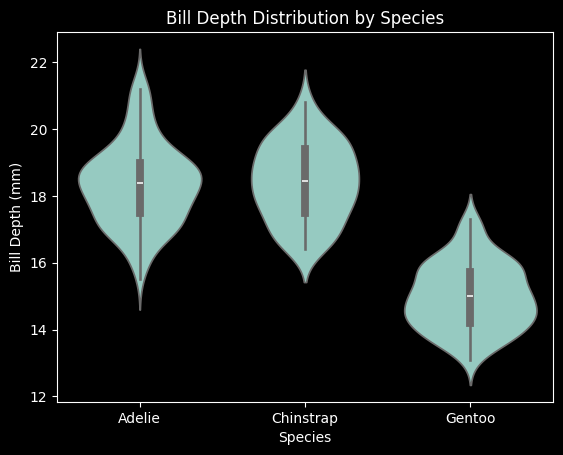

In [ ]:
# Violin plot for bill depth across species
sns.violinplot(data=penguins,
               x='species',
               y='bill_depth_mm')
plt.title('Bill Depth Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()


# Deploy into Production

Once we have a good enough story and visualisations for our dataset, we can deploy our analysis into production, for example:

- Prepare a presentation
- Write a report
- Build a dashboard

We can do all of these things with the help of Python!

It's even better if our stakeholders can interact with our data!

Next time, we'll create a beautiful interactive web app using `streamlit`, like this one:

[Cute Palmer Penguins](https://cute-palmer-penguins.streamlit.app/)
